In [0]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
%matplotlib inline

# machine learning
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
!pip install --upgrade -q gspread PyDrive

    100% |████████████████████████████████| 993kB 20.7MB/s 


In [0]:
import math
import os
import string
from datetime import datetime
import re
import json
import csv
import pickle
import requests
import collections
from pprint import pformat
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.preprocessing.label import LabelEncoder
import tensorflow as tf
# from pygeocoder import Geocoder
from shapely.geometry import Point

# Imports
# Numpy,Pandas
import numpy as np
import pandas as pd
import datetime

# matplotlib,seaborn,pyecharts

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# plt.style.use('ggplot')  #风格设置近似R这种的ggplot库
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import missingno as msno

# import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


#  忽略弹出的warnings
import warnings
warnings.filterwarnings('ignore')  

pd.set_option('display.float_format', lambda x: '%.4f' % x)

from imblearn.over_sampling import SMOTE
import itertools

In [0]:
#Goole Drive libs configuration
from oauth2client.client import GoogleCredentials
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import gspread
#@title Authenticate Google Drive client && create local directory
auth.authenticate_user()
credential = GoogleCredentials.get_application_default()
#iniate Google Spread Sheet
gc = gspread.authorize(credential)
#iniate Google Drive
gauth = GoogleAuth()
gauth.credentials = credential
drive = GoogleDrive(gauth)

# #2. Get the file
# downloaded = drive.CreateFile({'id':'1BH-rffqv_1auzO7tdubfaOwXzf278vJK'}) # replace the id with id of file you want to access
# downloaded.GetContentFile('xyz.csv') 

#Import file from Google Drive
def importfile(file_id='1W_SHJkvrYSCLXitec33iy7-MKG854ZnF'):
    f = drive.CreateFile({'id': file_id})
    print('Drive file (title: %s, id: %s)' % (f['title'], f['id']))
    fname = os.path.join(os.getcwd(), f['title'])
    print('file path: {}'.format(fname))
    f_ = drive.CreateFile({'id': f['id']})
    f_.GetContentFile(fname)
    return fname

def exportfile(file_name="sample.txt"):
    uploaded = drive.CreateFile({'title':file_name})
    uploaded.Upload()
    print('file {} uploaded to Google Drive'.format(file_name))
    
def create_dir(dir_name="Sample"):
  dir_path=os.path.join(os.getcwd(),dir_name)
  if not os.path.exists(dir_path):
    os.makedirs(dir_name)
  return dir_path


CWD=os.getcwd()
print("Current root dir: ",CWD)

Current root dir:  /content


In [0]:
def get_data(train_data,test_data):
    #define X, y
    X_train = train_data.drop(['label'], axis=1).values
    y_train = train_data['label'].values
    X_test = test_data.drop(['label'], axis=1).values
    y_test = test_data['label'].values
    return X_train, X_test, y_train, y_test

def nb_model(X_train, y_train):
    '''
    input: X_train, y_train
    output: model
    '''
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    return nb

def report(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    
def plot_confusion_matrix(y_test, y_pred,normalize=False):
    '''
    plot confusion matrix
    input: y_test,y_pred
    output: confusion matrix plot
    '''
    cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('naive bayes confusion matrix', y=1.1)
    #plt.ylabel('Actual label')
    #plt.xlabel('Predicted label')
    plt.show()
    plt.savefig('naive_nayes_confusion_matrix.png')  
    
def plot_roc_auc(X_test,y_test, y_pred):
    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, best_estimator.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    plt.title('Naive Bayes Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Naive_Bayes_ROC.png')
    plt.show()
    
def grid_search(param,X_train, y_train):
    '''
    grid search for svm
    with 5-fold cross validation
    '''
    nb_model = GridSearchCV(estimator=MultinomialNB(),
                             param_grid = param, 
                             scoring='roc_auc',
                             cv=5)
    nb_model.fit(X_train, y_train)
    print(nb_model.best_params_)
    print(nb_model.best_score_)  
    return nb_model

In [0]:
MultinomialNB().get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [0]:
train = importfile(file_id = '1x8nAoM8OPNUZLTexkZxQ6uKeGvlRl1w_')
test = importfile(file_id = '1JQkoZZAw-R1f_4KbT5T5AOGmPaItWe-H')

Drive file (title: train.csv, id: 1x8nAoM8OPNUZLTexkZxQ6uKeGvlRl1w_)
file path: /content/train.csv
Drive file (title: test.csv, id: 1JQkoZZAw-R1f_4KbT5T5AOGmPaItWe-H)
file path: /content/test.csv


{'alpha': 0.01}
0.6758656761650407
              precision    recall  f1-score   support

           0       0.40      0.64      0.50     89308
           1       0.44      0.23      0.30    109562

   micro avg       0.41      0.41      0.41    198870
   macro avg       0.42      0.43      0.40    198870
weighted avg       0.42      0.41      0.39    198870



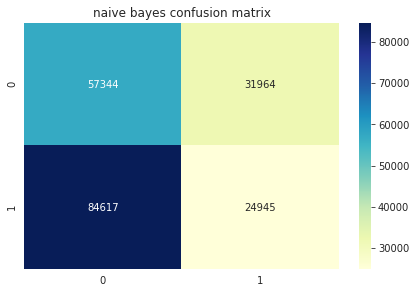

<Figure size 432x288 with 0 Axes>

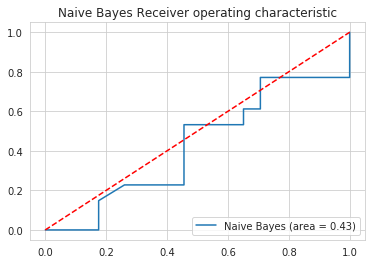

In [0]:
if __name__ == '__main__':
    train_data=pd.read_csv(os.path.join("/content",'train.csv'), index_col =0)
    test_data=pd.read_csv(os.path.join("/content",'test.csv'), index_col =0)
    X_train, X_test, y_train, y_test = get_data(train_data,test_data)
    # Set the parameters by cross-validation
    tuned_parameters = [{'alpha': [0.01, 0.1, 1]}]
    grid_naiv = grid_search(tuned_parameters, X_train, y_train)
    best_estimator = grid_naiv.best_estimator_
    best_estimator.fit(X_train, y_train)
    y_pred = best_estimator.predict(X_test)
    report(y_test, y_pred)
    plot_confusion_matrix(y_test, y_pred,normalize=False)
    plot_roc_auc(X_test,y_test, y_pred)